# Confinement Induced Electron Capture--  Zoomed In
## Brillouin Energy Corporation

Repear the calculations, zooming in


use the numerical precision features of the sympy library
http://docs.sympy.org/latest/modules/evalf.html


### Calculations

#### Physical Constants
see: http://pdg.lbl.gov/2015/reviews/rpp2015-rev-phys-constants.pdf

In [1]:
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


%matplotlib inline 

In [2]:
# scipy contains mant of the basic units
# in meters

# http://docs.scipy.org/doc/scipy/reference/constants.html
import scipy
from scipy import constants

# we use the python physics library sympy do to our calculations;
#  we use the units module, and the Gamma matrices 
#  but we do not (yet) use the Tensor module
import sympy
from sympy import *
from sympy.physics import units
from sympy.physics.matrices import mgamma

In [3]:
N(sqrt(2)*pi, 53)

4.4428829381583662470158809900606936986146216893756902

In [5]:
N(sqrt(2)*pi)

4.44288293815837

### Define constants and units 

Examples shown

In [6]:
print("speed of light in meters / sec is {}".format(constants.c))
print("hbar in m2 kg / s is {0}".format(constants.hbar))

print("angstrom in meters is {0}".format(constants.angstrom))
print("angstrom in fm is {0}".format(constants.angstrom/units.femto))

speed of light in meters / sec is 299792458.0
hbar in m2 kg / s is 1.0545718001391127e-34
angstrom in meters is 1e-10
angstrom in fm is 100000.000000000


In [13]:
hbarc =  constants.value('Planck constant over 2 pi times c in MeV fm')
print("hbarc: {} MeV fm".format(hbarc))

hbarc: 197.3269788 MeV fm


In [14]:
Mn = constants.value('neutron mass energy equivalent in MeV')
Mp = constants.value('proton mass energy equivalent in MeV')
me = constants.value('electron mass energy equivalent in MeV')

print("Mass proton,   neutron,   electon (in MeV)")
print(Mp, Mn, me)

Mass proton,   neutron,   electon (in MeV)
938.2720813 939.5654133 0.5109989461


In [15]:
# useful constants: not in scypi (or sympy)
# electron neutrino mass in MeV
mnu = Float(1.e-8) # MeV
print("mass electron neutrino: {0}".format(mnu))

mass electron neutrino: 1.00000000000000E-8


## <font color='red'>Using PNLL values of constants for debugging</font>
### Replace for final paper

REMOVED HERE

In [83]:
Ekemin = (((Mn + mnu - me)**2) - (Mp**2))/(2.0*(Mn+mnu))
pmin = sqrt(( Ekemin+me)**2 - me**2)
print("EKemin = {0} MeV".format(Ekemin))
print("  pmin = {0} MeV".format(pmin))

EKemin = 0.781581872048424 MeV
  pmin = 1.18728482199089 MeV


In [85]:
Ekemin = N((((Mn + mnu - me)**2) - (Mp**2))/(Float(2.0)*(Mn+mnu)), 53)
print("EKemin = {0} MeV".format(Ekemin))

pmin = N(sqrt((Ekemin+me)**2 - me**2), 53)
print("  pmin = {0} MeV".format(pmin))

EKemin = 0.78158187204842388684511433893931098282337188720703125 MeV
  pmin = 1.1872848219908894714819968470880226707229349199861441 MeV


$$E(KE)_{min}\simeq 0.782\;\mathring{A}$$
$$\;\;\;\;\;\;{p}_{min}\simeq 1.188\;\mathring{A}$$

#### Maximum Allowed Confinment

We can estimate of the maximum box size using a little relativistic kinematics.

For a classical 3-D particle-in-a-box, in units of $\hbar c$,  we have [13]

$$\mathbf{p}_{n}=\dfrac{3n\pi}{L}$$

so that for n=0, 

$$L_{max}=\dfrac{3\pi}{p_{min}}$$

We can use the relativistic ${p}_{min}$ to get the maximum box size

In [86]:
Lmax =N(sqrt(3.0)*pi*hbarc/pmin)*units.femto/constants.angstrom
print("The maximum box size is LMax = {0} in Angstroms".format(Lmax))

The maximum box size is LMax = 0.00904361469289747 in Angstroms


$$L_{max}=0.0090\;\mathring{A}$$

For a range size  $L\in[L_{min},L_{\max}]$,
$$0.004\le L \le0.009\;\mathring{A},$$

where 0.004 is the Compton length for the electron

we will compute the relativistic Kinetic energies, the rate of electron capture, and the effective power (ratio) for our box-induced electron capture.


### Relativisitic Kinematics

Before we do the full VA-theory calcualtions of confined electron capture, we can compute the Relativistic Kinematics to examine the Kinetetic Energy for the particles involves



####  RLConf = Box confinment lengths
Define the box sizes L, in units L (A°) for a classical particle-in-the-box

(for completeness, we will use $ 0.0001\le L \le0.009\;\mathring{A} $, including boxes smaller than the Compton scale)



## <font color='green'> Change box size </font>

In [98]:
# we may simplify this code
rlconfs = []
peps = []
for iep in range(1,500):
    pgrid =  N(exp(log(1e-11)+(Float(iep)/500.0)*(log(0.01)-log(1e-11))), 53)
    pep = N((pmin + pgrid)/sqrt(3.0), 53)
    peps.append(pep)
    rlconf = N((1e-5)*hbarc*pi/pep, 53)
    rlconfs.append(rlconf)
    
print("The box size range in [{0},{1}] Angstroms".format(np.min(rlconfs), np.max(rlconfs)))

The box size range in [0.0089711223950778815898734022774936615560606202279627422,0.0090436146928180793720419668788533300390114504791314929] Angstroms


### $ \mathbf{p}_{min} $ vs L

We  see how confinement causes the (proton/electon) $ \mathbf{p}_{min} $to increase

#### We add in the box sizes L < $0.004 \mathring{A}$, below the Compton Length

We present these results for completeness only, in order to help visualize the results.


#### Kinetic Energy Calculations

We now calculate and plot the all the Kinetic energies

That is, we compute $ \mathbf{p}^{0}_{ep} $ as well as $ K_{n},K_{p},K_{e},and\;K_{\nu} $ 

We will compute the full $ \mathbf{p}_{ep} $ in the next section, below

In [99]:
#  compute the [0] component of the 4 vectors:  p1 , p2 , pe, pk 
# p1 neutron
# p2 proton
# pe electron
# pk neutrino
#
#  assumes exactly cubic lattic:  pep1 = pep2 = pep3 = +|- pep
#  we may change this later for additional calculations
def pepKE(pep):

    p2 = N(sqrt((Mp**2) + Float(3.0)*(pep**2)), 53)
    pe = N(sqrt((me**2) + Float(3.0)*(pep**2)), 53)
    Etot = N(p2 + pe, 53)

    Eknu = N(( (Etot-mnu)**2 - (Mn**2) )/(Float(2.0)*Etot), 53)
    Ekn = N(( (Etot-Mn)**2 - (mnu**2) )/(Float(2.0)*Etot), 53)
    pnu =  N(sqrt( (Eknu+mnu)**2 - (mnu**2) ) ,53)
    
    pk = N(Eknu + mnu, 53)
    p1 = N(p2 + pe - pk, 53)
    
    return p1, p2, pe, pk

In [100]:
min(peps)

0.68547921158721480616895296789429060082688866282826948

In [101]:
pepKE(np.min(peps))

(939.56541330000004780809858669099903738898582001279144,
 938.27283249185165285001814143835230822421975187002172,
 1.2925808181579979956937140121299295208531415326623396,
 0.000000010009603037613268759483200356087073389892617648118621)

In [102]:
num = len(peps)
EKn = np.zeros(num)
EKp = np.zeros(num)
EKe = np.zeros(num)
EKnu = np.zeros(num)
Etot = np.zeros(num)

In [103]:
for i, pep in enumerate(peps):
    p1, p2, pe, pk = pepKE(pep)
    EKn[i] = N(p1 - Mn, 53)
    EKp[i] = N(p2 - Mp, 53)
    EKe[i] = N(pe - me, 53)
    EKnu[i] = N(pk - mnu, 53)

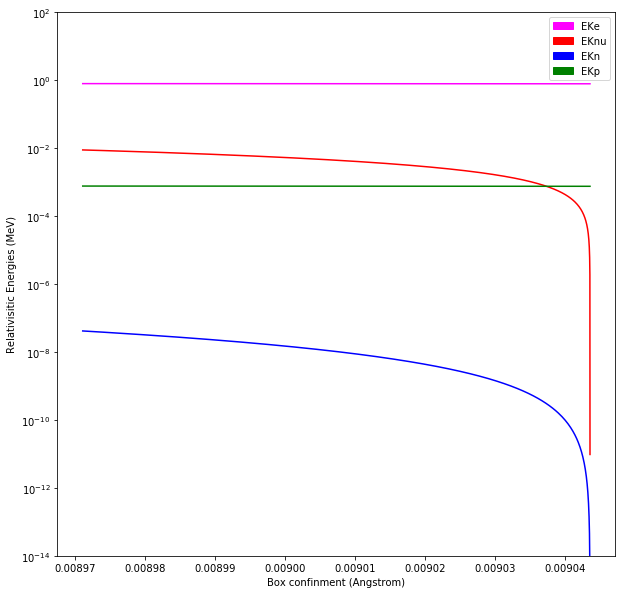

In [104]:
plt.semilogy(rlconfs, EKe , color='magenta')
plt.semilogy(rlconfs, EKnu, color='red' )
plt.semilogy(rlconfs, EKn, color='blue')
plt.semilogy(rlconfs, EKp, color='green')

patches = [ mpatches.Patch(color='magenta', label='EKe'),
            mpatches.Patch(color='red', label='EKnu'),
            mpatches.Patch(color='blue', label='EKn'),
            mpatches.Patch(color='green', label='EKp')          ]
plt.legend(handles=patches)

plt.xlabel("Box confinment (Angstrom)")
plt.ylabel("Relativisitic Energies (MeV)")

plt.ylim(ymin=0.00000000000001)
plt.ylim(ymax=100.0) 

from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.show()

The electron and proton energies are failry constant, slighly descreasing, as the box size increases.

In contrast, the energy of the neutron drops slowly as the box increases, and the electron neutrino energy drops marketed as the box approaches 0.009 $\mathring{A}$

For $L < 0.004 \mathring{A}$, the proton and electron energies are no longer constant, and, instead increase marketedly.  Likewise, the neutron and electron neutrino energies also blow up.



### To realy zoom in, we need to change the grid 

Due to numerical accuracy, we can only go so close to the 




The complete calculations should include the electron capture rates and associated power. To get there, we need 

### Full Relativisitc Kinematic Calculations

To compute the full Dirac 4-vectors, we need to we integrate over the solid angle  $ k^{3}\Omega $.  We treat the electron neutrino as a particle scattering, and represent the $\overrightarrow{p_{\nu}}$ momentum (x,y,z) components

<img src="img/solid-angle.png" width="400" height="400" />
<center>neutrino scattering</center>

where r = 1

We integrate over $z, \theta$ (instead of $\phi, \theta$), where the $\mathbf{p}_{\nu}$ 4-vector given as


$$\mathbf{p}_{\nu}\sim\left[\begin{array}{c}
E_{\nu}+m_{\nu}\\
|p_{\nu}|\;\sqrt{(1-z^{2})}cos(\phi)\\
|p_{\nu}|\;\sqrt{(1-z^{2})}sin(\phi)\\
|p_{\nu}|\;z\end{array}\right]\;$$ 

where
 

$$ |p_{\nu}|=\sqrt{(E_{\nu}+m_{\nu})^{2}-m_{\nu}^{2}}$$



Applying the change of variables

$$ sin(\theta)=z $$
$$ cos(\theta)=\sqrt{(1-z^{2})} $$

with Jacobian

$$ J = ?? $$ <font color='red'> need Jacobian </font>

the new limits are
$$  z\in[-1,1]$$


$$  \theta\in[0,2\pi]$$



#### Gaussian Quadrature


We integrate over the momenta using an 8-point Gaussian quadrature 

Note the quadrature points and weights for $\theta$ are rescaled so that:

$$  lg_{\phi}: [-1,1]\rightarrow [0, 2\pi] $$

$$ w_{phi}: w\pi $$


In [ ]:
import numpy as np

from numpy.polynomial.legendre import leggauss
lg_x, lg_wx = leggauss(8)
lg_phi, lg_wphi = leggauss(8)

lg_phi = (lg_phi+1.0)*np.pi
lg_wphi = lg_wphi*np.pi

Actual: 

<pre>
 0.10122853629037618       0.22238103445337445       0.31370664587788660       0.36268378337836199       0.36268378337836199       0.31370664587788660       0.22238103445337445       0.10122853629037618     
    

0.31801882594349357       0.69863062413641985       0.98553849407226335        1.1394047094376138        1.1394047094376138       0.98553849407226335       0.69863062413641985       0.31801882594349357    
</pre>

In [ ]:
print(lg_wx,lg_wphi)

###  this section needs more work

In [ ]:
#  full computation of 4 vectors:  p1 , p2 , pe, pk 
def pekin(x , phi , pep_xyz):
    
    pep_x = pep_xyz[0]
    pep_y = pep_xyz[1]
    pep_z = pep_xyz[2]

    
    p1 = np.zeros(4)
    p2 = np.zeros(4)
    pe = np.zeros(4)
    pk = np.zeros(4)
    
    # proton
    p2[0] = np.sqrt(Mp**2 + pep_x**2  + pep_y**2  + pep_z**2 )
    p2[1] = -pep_x
    p2[2] = -pep_y
    p2[3] = -pep_z
    
    # electron
    pe[0] = np.sqrt(me**2 + pep_x**2  + pep_y**2  + pep_z**2 )
    pe[1] = pep_x
    pe[2] = pep_y
    pe[3] = pep_z
    
    Etot = p2[0] + pe[0]
 

    Eknu = ((Etot-mnu)**2 - (Mn)**2)/(2.0*Etot)
    Ekn = ((Etot-Mn)**2 - mnu**2)/(2.0*Etot)
    pnu = np.sqrt((Eknu+mnu)**2 - mnu**2)
    
    
    pk[0] = Eknu + mnu
    pk[1] = pnu*np.sqrt(1.0 - x**2)*np.cos(phi)
    pk[2] = pnu*np.sqrt(1.0 - x**2)*np.sin(phi)
    pk[3] = pnu*x
    
    # vector element wise addition
    # neutron
    p1 = p2 + pe - pk

    return p1, p2, pe, pk

### <font color='red'>Like a  unit test</red>

Compare to Fortran code from PNNL
<code>
pe-one.f 
</code>

'pekin',x,phi,pep1,pep2,pep3

 pekin -0.96028985649753629       0.12475309510033646      -0.68547984819958607      -0.68547984819958607      -0.68547984819958607     
 
 p1   939.56534599999998       -1.2173944499465628E-010  -1.5266654875346383E-011   4.2229031599413131E-010  
 p2   938.27276419330155       0.68547984819958607       0.68547984819958607       0.68547984819958607       
 pe   1.2925818167080840      -0.68547984819958607      -0.68547984819958607      -0.68547984819958607       
 pk   1.0009664463617206E-008   1.2173944499465628E-010   1.5266654875346383E-011  -4.2229031599413131E-010  



In [ ]:
pep_xyz = peps[0]*np.array([-1.0,-1.0,-1.0])
print(lg_x[0],lg_phi[0],peps[0])
p1, p2, pe, pk  = pekin(lg_x[0] , lg_phi[0] , pep_xyz)
print ('p1', p1)
print('p2', p2)
print('pe', pe)
print('pk', pk)

### <font color='green'>Looks correct</red>


### Rate of Confined Electron Capture

Given the computed Dirac 4-vectors, we can compute the rate of electron capture using the VA-theory, for a given set of vectors

For the process

$$E_{box}+p^{+}+e^{-}\rightarrow n^{0}+\nu_{e}$$

The rate $\Gamma_{EC}$ of electron capture is determined by multiplying the cross section by the incident velocity $\mathbf{v}_{in}$ and the the electronic wavefunction at the origin 

$$\Gamma_{EC}=\big\vert\Psi(0)\big\vert^{2}\mathbf{v}_{in}\sigma_{EC}$$

This gives us an expression of the form (see Appendix):

$$d\lambda_{ep}=\left(\dfrac{1}{2\pi}\right)^{2}\dfrac{\sum_{fi}\big\vert\mathcal{M}_{fi}\left[\mathcal{p}_{ep}\rightarrow i\nabla)\right]\psi_{ep}(\mathbf{x})\big\vert_{\mathbf{x}=0}\big\vert^{2}}{16E_{p}E_{e}\;\big\vert\mathbf{k}\cdot(E{_n}\mathbf{k}-k^{0}\mathbf{p}_{n})\big\vert}k^{3}d\Omega_{k}$$

(A crude derivation is given in an older notebook..we should redo)


###  High Energy Physics(HEP) Calculations


#### Hadronic and Leptonic Currents

To compute the matrix elements $\mathcal{M_EC}$, we need the Hadron and Lepton currents as an function of the box size L, using the relativistic 4-momenta determined by the relativistic kinematics (described above).

Let $\mathbf{J}_{had}$ and $\mathbf{L}_{lep}$ be the 4-vectors representing the Hadron and Lepton (current) matrix elements, respectively, such that

$$\mathbf{J}_{had}=\bar{u}(p_{n},s_{n})(G_{V}-G_{A}\gamma^{5})\gamma^{\mu}u(p_{p},s_{p})$$

$$\mathbf{L}_{lep}=\bar{u}(k,s_{k})\gamma_{u}(1-\gamma^{5})u(s_{e},p_{e})$$




#### python sympy package

We use the python sympy physics module to obtain the Gamma matrices

We do not use the Tensor module to do the matrix calculations since it would be more complicated to explain how to use it than just code up the dirac 4-vector matrix elements -- the Hadron and Lepton currents -- explicitly


#### Constants

We need the most recent versions of the Fermi coupling constant $ G_{F} $ and the (ratio of) the Vector-Axial coupling coffecients.


In [ ]:
GF = constants.value('Fermi coupling constant')*((units.mega/units.giga)**2)
print("GF = {0} 1/MeV^2".format(GF))

# Vector Axial Couplings of the weak current to the nucleons
# The currently accepted value of ga/gv is (2010?)
# http://arxiv.org/pdf/1007.3790v2.pdf
# (Im still looking for the most recent constant)
GV = 1.0 
#GA = -1.27590*GV   # Value quoted in paper I think
GA = -1.285*GV  # Ricks value

print("GV, GA = {0}, {1} ".format(GV, GA))

Let us define the matrics:

$$C_{left} = 1-\gamma^{5}$$
$$C_{GVGA} = G_{V}-G_{A}\gamma^{5}$$

and use the python module to compute them, and then convert them to numpy arrays

In [ ]:
cLEFT = diag(1.0,1.0,1.0,1.0) - mgamma(5)
cLEFT = np.array(cLEFT).astype(np.float64)
print("cLEFT")
print(cLEFT)

In [ ]:
cGVGA = diag(GV,GV,GV,GV) - GA*mgamma(5)
cGVGA = np.array(cGVGA).astype(np.float64)
print("cGVGA")
print(cGVGA)

In [ ]:
def gamma(i):
    return np.array(mgamma(i)).astype(np.complex64)

In [ ]:
GAMMA_0 = gamma(0)
print("Gamma_0")
print(GAMMA_0)

### sympy does not have a great module for Relativistic 4-vectors

At least not something that is easy to use, so we just code this up.


#### Dirac Spinors (again)

##### Recall the  Relativistic four-vectors for particles are

$$u(\overrightarrow{p},s=up)=\sqrt{E+m}\left[\begin{array}{c}
0\\
1\\
\dfrac{p_{3}}{E+m}\\
\dfrac{p_{1}+ip_{2}}{E+m}
\end{array}\right]\;\;u(\overrightarrow{p},s=down)=\sqrt{E+m}\left[\begin{array}{c}
1\\
0\\
\dfrac{p_{1}-ip_{2}}{E+m}\\
\dfrac{-p_{3}}{E+m}
\end{array}\right]$$ 

##### The Dirac Adjoint is given by

https://en.wikipedia.org/wiki/Dirac_adjoint

$$\bar{u}=u^{\dagger}\gamma^{0}$$

where $u^{\dagger}$ is the complex conjugate of $u$, and $\gamma^{0}$ is defined above (in given in sympy package)

##### The four-vector norm uses the standard (west) convention

$$\langle\bar{u}|u\rangle=\bar{u}_{0}u_{0}-\bar{u}_{1}u_{1}-\bar{u}_{2}u_{2}-\bar{u}_{3}u_{3}$$



In [ ]:
def u_spinors(p ,mass):
    
    Em = p[0] + mass
    fac = np.sqrt(Em)    
    
    u = np.zeros([2,4], dtype=np.complex64)
    u[0,0] = 1.0
    u[0,1] = 0.0
    u[0,2] = p[3] / Em
    u[0,3] = (p[1] + p[2]*1.j) / Em

    u[1,0] = 0.0
    u[1,1] = 1.0
    u[1,2] = (p[1] - p[2]*1.j) / Em
    u[1,3] = -(p[3]) / Em

    u = fac*u
    
    return u

In [ ]:
def dirac_adjoint(u):
    return np.conj(u).dot(GAMMA_0)

In [ ]:
def four_vector_norm(v,w):
    return v[0]*w[0]-(v[1]*w[1]+v[2]*w[2]+v[3]*w[3])

## Full Calculation

 The full calculations sums of over all 6 possible $(\pm\mathbf{p}_{ep}(1),\pm\mathbf{p}_{ep}(2),\pm\mathbf{p}_{ep}(3) )$ combinations, and the 16 allowed spin transitions (see figure below), and averaging over the outbound neutrino momenta ($k^{3}d\Omega_k$) using an 8-point gaussian quadrature. 


I would like a diagram like this, showing the 16 all possible spin combinations for electron capture; this diagram is for Beta decay
<img src="16-allowed.png"  width="400" height="400">


In fact, only 4 terms really contribute , which we show below

## <font color='red'>Test: Convert to unit tests</font>

In [ ]:
C_hadron = np.zeros([4], np.complex64)
C_lepton = np.zeros([4], np.complex64)

pep_xyz = -peps[0]*np.array([1.0,1.0,1.0])
pn, pp, pe, pk = pekin(lg_x[0], lg_phi[0], pep_xyz )

u_n = dirac_adjoint(u_spinors(pn,Mn))
u_p = u_spinors(pp,Mp)

u_k = dirac_adjoint(u_spinors(pk,mnu))
u_e = u_spinors(pe,me)

for i in range(4):
    C_hadron[i] = u_n[0].dot(cGVGA).dot(gamma(i)).dot(u_p[0])
    C_lepton[i] = u_k[0].dot(gamma(i)).dot(cLEFT).dot(u_e[0])

C_amplitude = four_vector_norm(C_hadron,C_lepton)
     

 Correct values from old Fortran code...used as a 'unit test' for code here
 
 <code>
 pe-one.f
 </code>
 
 chad0 (  1876.9558411683693     , -3.8866494140631290E-014)  
 chad1 ( 0.68595198768896293     , 0.68595198782581046     )  
 chad2 ( 0.68595198779531263     ,-0.68595198793216017     )  
 chad3 ( -2412.3349649848910     , -4.9943444970711202E-014)  
 
 clep0 (  2.6721137933833104E-004, -3.8418962344619817E-007)  
 clep1 ( -7.2130294594350693E-005, -7.3925390570866875E-005)  
 clep2 ( -7.3525333773868798E-005,  7.5320429750384981E-005)  
 clep3 ( -2.6820010747929376E-004, -3.8418962344619817E-007)  
 
 camp2:  (-0.14544700030859581     , -1.6498148794794943E-003)


In [ ]:
print(C_hadron[0])
print(C_hadron[1])
print(C_hadron[2])
print(C_hadron[3])

print("   ")
print(C_lepton[0])
print(C_lepton[1])
print(C_lepton[2])
print(C_lepton[3])

print("   ")
print(C_amplitude)

## <font color='green'>Looks good</font> 
#### although the results are not exactly the same -- 

I beleive Rick has a bug in his code...I found one already

### Power 

<font color='red'> explained more clearly in the paper </font>

Recall that the capture rate is

$$d\lambda_{ep}=\left(\dfrac{1}{2\pi}\right)^{2}\dfrac{\sum_{fi}\big\vert\mathcal{M}_{fi}\left[\mathcal{p}_{ep}\rightarrow i\nabla)\right]\psi_{ep}(\mathbf{x})\big\vert_{\mathbf{x}=0}\big\vert^{2}}{16E_{p}E_{e}\;\big\vert\mathbf{k}\cdot(E{_n}\mathbf{k}-k^{0}\mathbf{p}_{n})\big\vert}k^{3}d\Omega_{k}$$



The Power comes from the integral of the rate equation  over all momentum terms (the solid angle of momentum), taking into account the subsequent neutron reaction.  


$$P1 = P_{pe}=C^{2}_{Re}\left[(\mathbf{E}_{e}-m_{e})+(\mathbf{E}_{p}-M_{p})\right]\left(frac\right)$$

If we assume the nuetron is ultra-cold, then we can estimate the maximum power output for the neutron interacting with one more proton

$$P2 = P_{n}=C^{2}_{Re}\left[2.2+(\mathbf{E}_{n}-M_{n})\right]\left(frac\right)$$

where 

$$frac=r_{c}\left(\dfrac{p_{ep}}{2\pi}\right)^{3}\left(\dfrac{G_{F}^{2}(E_{\nu}^{2}-m_{\nu}^{2})^{3}}{512\pi^{2}\;E_{p}E_{e}\hbar c\;\big\vert\; \mathbf{k}(E_{n}p_{\nu}-E_{\nu}p_{n})\;\big\vert}\right)$$

make clear:
$$E_{\nu}=k^{0}$$

what is $r_c$ *(I will clarify soon)?



Where the Real part of the the total (4-vector) current amplitude is given by

$$C^{2}_{Re}=Re(\bar{C}^{2}_{amp}{C}^{2}_{amp})$$

and 

$$C^{2}_{amp}=(\mathbf{J}_{had})^{\mu}(\mathbf{L}_{lep})_{\mu}=J^{0}_{had}L^{0}_{lep}-J^{1}_{had}C^{1}_{lep}-J^{2}_{had}L^{2}_{lep}-J^{3}_{had}L^{3}_{lep}$$





In [ ]:
rc = 299792458.0#   ! m/s    
def matrix_element_factor(pep,pn,pp,pk,pe):
    
    ftop = (rc*((pep/(2.0*np.pi))**3)*(GF**2)*(np.sqrt(pk[0]**2-mnu**2))**3 )

    fbot = (512.0 *(np.pi **2)* pp[0]* pe[0]* hbarc * 1.e-15)* \
        np.absolute((pk[1]*(pn[0]*pk[1]-pk[0]*pn[1])) + \
                    (pk[2]*(pn[0]*pk[2]-pk[0]*pn[2])) + \
                    (pk[3]*(pn[0]*pk[3]-pk[0]*pn[3])) ) 
        
    fac = ftop/fbot
    return fac, ftop, fbot


<code>pe-one.f
</code>

this is hard to get exactly...may need better precision

 ftop   4.5036454915307286E-045  
 fbot   2.1972923442022533E-022  
 fact   2.0496341797276035E-023  

In [ ]:
pep = peps[0]
fact, ftop, fbot = matrix_element_factor(pep,pn,pp,pk,pe)

#### note: these are large terms that cancel each other

In [ ]:
print("ftop: {0}".format(ftop))
print("fbot: {0}".format(fbot))
print("fact: {0}".format(fact))

## <font color='green'>Looks good</font>

Only 4 terms really contribute

- n, p, e, k  
- 1, 1, 2, 2  up up down down
- 1, 2, 1, 2  up down up down
- 2, 1, 2, 1  down up down up
- 2, 2, 1, 1, down down up up


<pre>
print(n_spn+1,p_spn+1,e_spn+1,k_spn+1, campR)

(1, 1, 1, 1, 0.68995655172419479)
(1, 1, 1, 2, 2.4878742951983668e-05)
(1, 1, 2, 1, 0.0016000513606400091)
(1, 1, 2, 2, 40.780081813622715)
(1, 2, 1, 1, 0.0020239698407603524)
(1, 2, 1, 2, 51.584417437266495)
(1, 2, 2, 1, 1.2197274440461925e-19)
(1, 2, 2, 2, 0.0)
(2, 1, 1, 1, 0.0)
(2, 1, 1, 2, 1.3552527156068805e-20)
(2, 1, 2, 1, 56.128815187854343)
(2, 1, 2, 2, 0.0020239697550071566)
(2, 2, 1, 1, 44.372659658512021)
(2, 2, 1, 2, 0.0016000537263360926)
(2, 2, 2, 1, 2.4879332933380738e-05)
(2, 2, 2, 2, 0.63409508059595532)
</pre>

In [ ]:
#### TODO  recode main loop
num = len(peps)
num = 21


EKn = np.zeros(num)
EKp = np.zeros(num)
EKe = np.zeros(num)
EKnu = np.zeros(num)
Etot = np.zeros(num)
box_size = np.zeros(num)

signs = [-1.0,1.0]
spins = [0,1]

C_hadron = np.zeros([4], np.complex64)
C_lepton = np.zeros([4], np.complex64)

tran = 0.0+0.0j
tran2 = np.zeros(num, np.complex64)

N_QUAD = 1

#for iep, pep in enumerate(peps):
iep = 0
for idx in range(0,500,25):
#for idx in range(1):
    iep += 1
    pep = peps[idx]
    box_size[iep] = rlconfs[idx]
    
    # gaussian quadrature
    for ix in range(N_QUAD):                  
        for ip in range(N_QUAD):
            # neutrino momentum loop
            
            
            # 16 spin combinations
            for n_spn in spins:
                for p_spn in spins:
                    for e_spn in spins:
                        for k_spn in spins:
                                                    
                            tran = 0.0
                            C_amplitude = 0.0+0.0j
            
                            # +/- pep momentum combinations
                            for s1 in signs:
                                for s2 in signs:
                                    for s3 in signs:
                                              
                                        p_xyz = pep*np.array([s1,s2,s3])
                                        pn, pp, pe, pk = pekin(lg_x[ix], lg_phi[ip], p_xyz )

                                        u_n = dirac_adjoint(u_spinors(pn,Mn)[n_spn])
                                        u_p = u_spinors(pp,Mp)[p_spn]
                                        u_k = dirac_adjoint(u_spinors(pk,mnu))[k_spn]
                                        u_e = u_spinors(pe,me)[e_spn]

                                        for i in range(4):
                                            C_hadron[i] = u_n.dot(cGVGA).dot(gamma(i)).dot(u_p)
                                            C_lepton[i] = u_k.dot(gamma(i)).dot(cLEFT).dot(u_e)

                                        C_amplitude  += four_vector_norm(C_hadron,C_lepton)

            
                            tran+= lg_wx[ix]*lg_wphi[ip]*((np.conj(C_amplitude)*C_amplitude).real)
                            tran2[iep] += tran*matrix_element_factor(pep,pn,pp,pk,pe)[0]
                            
                            campR = (np.conj(C_amplitude)*C_amplitude).real
                            fact = matrix_element_factor(pep,pn,pp,pk,pe)[0]
                            #print(n_spn+1,p_spn+1,e_spn+1,k_spn+1, campR)

    EKn[iep] = pn[0] - Mn
    EKp[iep] = pp[0] - Mp
    EKe[iep] = pe[0] - me
    EKnu[iep] = pk[0] - mnu
    #print("iep, tran2 ", iep, tran2[iep])


In [ ]:
# conversions for power density
#dN0 = 6.02214179e23      # molˆ-1                                                                                                 
dN0 = scipy.constants.Avogadro
rlconfs[0],tran2[0]*dN0*0.25, tran2[0]

### TODO: recheck against TAP

In [ ]:
plt.semilogy(box_size, EKe , color='magenta')
plt.semilogy(box_size, EKnu, color='red' )
plt.semilogy(box_size, EKn, color='blue')
plt.semilogy(box_size, EKp, color='green')

plt.semilogy(box_size, tran2, color='black')


patches = [ mpatches.Patch(color='magenta', label='EKe'),
            mpatches.Patch(color='red', label='EKnu'),
            mpatches.Patch(color='blue', label='EKn'),
            mpatches.Patch(color='green', label='EKp'),
            mpatches.Patch(color='black', label='tran2')          ]

plt.legend(handles=patches)

plt.xlabel("Box confinment (Angstrom)")
plt.ylim(ymin=0.000000000000000001)
plt.ylim(ymax=100.0) 

plt.xlim(xmin=0.008)
plt.xlim(xmax=0.00905) 

from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.show()

### Zoom in

In [ ]:
plt.semilogy(box_size, EKe , color='magenta')
plt.semilogy(box_size, EKnu, color='red' )
plt.semilogy(box_size, EKn, color='blue')
plt.semilogy(box_size, EKp, color='green')

plt.semilogy(box_size, tran2*dN0*0.25, color='black')

plt.semilogy(box_size, tran2, color='black')


patches = [ mpatches.Patch(color='magenta', label='EKe'),
            mpatches.Patch(color='red', label='EKnu'),
            mpatches.Patch(color='blue', label='EKn'),
            mpatches.Patch(color='green', label='EKp'),
            mpatches.Patch(color='black', label='tran2')          ]

plt.legend(handles=patches)

plt.xlabel("Box confinment (Angstrom)")
plt.ylim(ymin=0.0000000000001)
plt.ylim(ymax=100.0) 

from pylab import rcParams
rcParams['figure.figsize'] = 5,5
plt.show()

In [ ]:

plt.semilogy(box_size, tran2*dN0*0.25, color='black')


from pylab import rcParams
rcParams['figure.figsize'] = 5,5
plt.show()

## Discussion

The black curve is the power consumed by the confined electron capture; the red curve is the power from the outbound neutron combining with another proton (a confined neutron capture). The orange curve is the power ratio.  The power ratio is positive throughout the box, and increasing with box size L. 


In [ ]:
max(rlconfs), len(rlconfs)

In [ ]:
rlconfs[0], rlconfs[-1]